# [COVID-19] - Data visualization and Analysis.

Covid-19, also known as coronavirus, is an infectious disease caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). It was primally identified in December 2019 in Wuhan, China and has spread globally, resulting in an ongoing pandemic (Wikipedia). This notebook shows the impact caused by covid around the world and brings a brief study in Brazil.


---

#### Last time executed:

In [249]:
import datetime as dt
print(dt.datetime.now())

2020-05-23 19:58:49.948714


#### Libraries:

In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

#### Data obtained from Johns Hopkins University.<br> 
Source: https://github.com/CSSEGISandData/COVID-19

In [251]:
df_confirmed_cases = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/C" +
                                 "OVID-19/master/csse_covid_19_data/csse_covid_19_ti" +
                                 "me_series/time_series_covid19_confirmed_global.csv")
df_recovered_cases = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVI" +
                                 "D-19/master/csse_covid_19_data/csse_covid_19_time_ser" +
                                 "ies/time_series_covid19_recovered_global.csv")
df_death_cases = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/" +
                             "master/csse_covid_19_data/csse_covid_19_time_series/time_s" +
                             "eries_covid19_deaths_global.csv")

In [252]:
df_confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,880,898,916,933,946,948,949,964,969,981
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,6253,6442,6629,6821,7019,7201,7377,7542,7728,7918
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,760,761,761,761,761,761,761,762,762,762
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,45,48,48,48,48,50,52,52,58,60


In [253]:
df_recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,648,691,745,745,778,801,850,930,938,996
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,688,694,705,714,715,727,742,758,771,777
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3058,3158,3271,3409,3507,3625,3746,3968,4062,4256
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,576,596,604,615,617,624,628,639,639,652
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,14,14,17,17,17,17,17,17,17,17


In [254]:
df_death_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,132,136,153,168,169,173,178,187,193,205
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,31,31,31,31,31,31,31,31,31,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,522,529,536,542,548,555,561,568,575,582
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,49,49,49,51,51,51,51,51,51,51
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,3,3,3,3,3


In [255]:
start_date = '1/22/20'
# Needed because of daily updates on database which cannot be updated yet
# where the date of "today" has not been updated.
# So, for practicity, we get one day before. We could get the last column as well.
# end_date = (dt.datetime.today() - dt.timedelta(days=1)).strftime('%-m/%d/%y')
end_date = df_confirmed_cases.columns[-1]

In [256]:
df_top10 = df_confirmed_cases.groupby(['Country/Region']).sum()
df_top10 = df_top10.loc[:, start_date:end_date]
df_top10 = df_top10.sort_values(by=[end_date]).tail(10)

In [257]:
df_top10

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Iran,0,0,0,0,0,0,0,0,0,0,...,112725,114533,116635,118392,120198,122492,124603,126949,129341,131652
Turkey,0,0,0,0,0,0,0,0,0,0,...,143114,144749,146457,148067,149435,150593,151615,152587,153548,154500
Germany,0,0,0,0,0,1,4,4,4,5,...,174098,174478,175233,175752,176369,176551,177778,178473,179021,179710
France,0,0,2,3,3,3,4,5,5,5,...,178184,178994,179630,179630,179693,180051,180933,181700,181951,182015
Italy,0,0,0,0,0,0,0,0,0,2,...,222104,223096,223885,224760,225435,225886,226699,227364,228006,228658
Spain,0,0,0,0,0,0,0,0,0,0,...,228691,229540,230183,230698,230698,231606,232037,232555,233037,234824
United Kingdom,0,0,0,0,0,0,0,0,0,2,...,230985,234440,238004,241461,244995,247709,250138,249619,252246,255544
Russia,0,0,0,0,0,0,0,0,0,2,...,242271,252245,262843,272043,281752,290678,299941,308705,317554,326448
Brazil,0,0,0,0,0,0,0,0,0,0,...,190137,203165,220291,233511,241080,255368,271885,291579,310087,330890


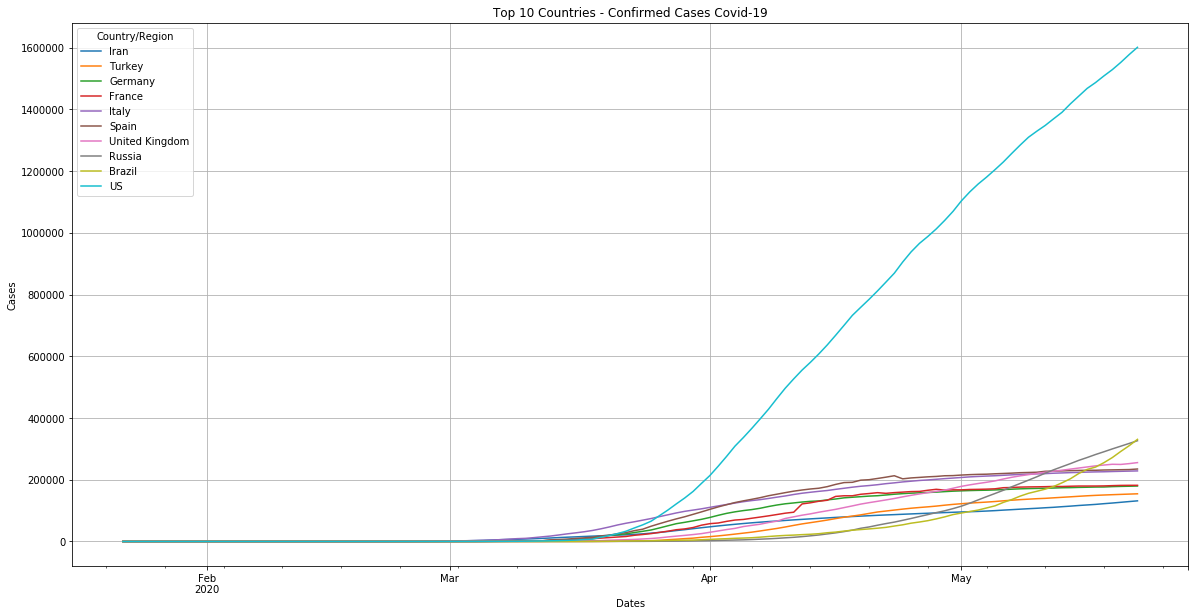

In [258]:
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(1,1,1)
df_top10 = df_top10.T
df_top10.index = pd.to_datetime(df_top10.index)
df_top10.plot(ax=ax, legend=True)
ax.set_title("Top 10 Countries - Confirmed Cases Covid-19", fontsize=12)
ax.grid(True)
ax.set(xlabel='Dates', ylabel="Cases");

Extracting data about recovered cases from Top 10 Countries Confimed Cases by name.

In [259]:
top10_countries = df_top10.columns.tolist() # Name of countries inside top 10
# Searching recovered cases with the top10 countries name.
df_recovered = df_recovered_cases.loc[df_recovered_cases['Country/Region'].isin(top10_countries)]
df_recovered = df_recovered.groupby(['Country/Region']).sum()
df_recovered = df_recovered.loc[:, start_date:end_date]
df_recovered = df_recovered.sort_values(by=[end_date]).tail(10)

In [260]:
df_recovered

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
United Kingdom,0,0,0,0,0,0,0,0,0,0,...,1032,1043,1047,1058,1058,1090,1099,1116,1134,1142
France,0,0,0,0,0,0,0,0,0,0,...,58786,59719,60562,60562,61327,61843,62678,63472,63976,63986
Russia,0,0,0,0,0,0,0,0,0,0,...,48003,53530,58226,63166,67373,70209,76130,85392,92681,99825
Iran,0,0,0,0,0,0,0,0,0,0,...,89428,90539,91836,93147,94464,95661,97173,98808,100564,102276
Turkey,0,0,0,0,0,0,0,0,0,0,...,101715,104030,106133,108137,109962,111577,112895,113987,114990,116111
Brazil,0,0,0,0,0,0,0,0,0,0,...,78424,79479,84970,89672,94122,100459,106794,116683,125960,135430
Italy,0,0,0,0,0,0,0,0,0,0,...,112541,115288,120205,122810,125176,127326,129401,132282,134560,136720
Spain,0,0,0,0,0,0,0,0,0,0,...,140823,143374,144783,146446,146446,150376,150376,150376,150376,150376
Germany,0,0,0,0,0,0,0,0,0,0,...,148700,150300,151597,152600,154011,155041,155681,156966,158087,159064


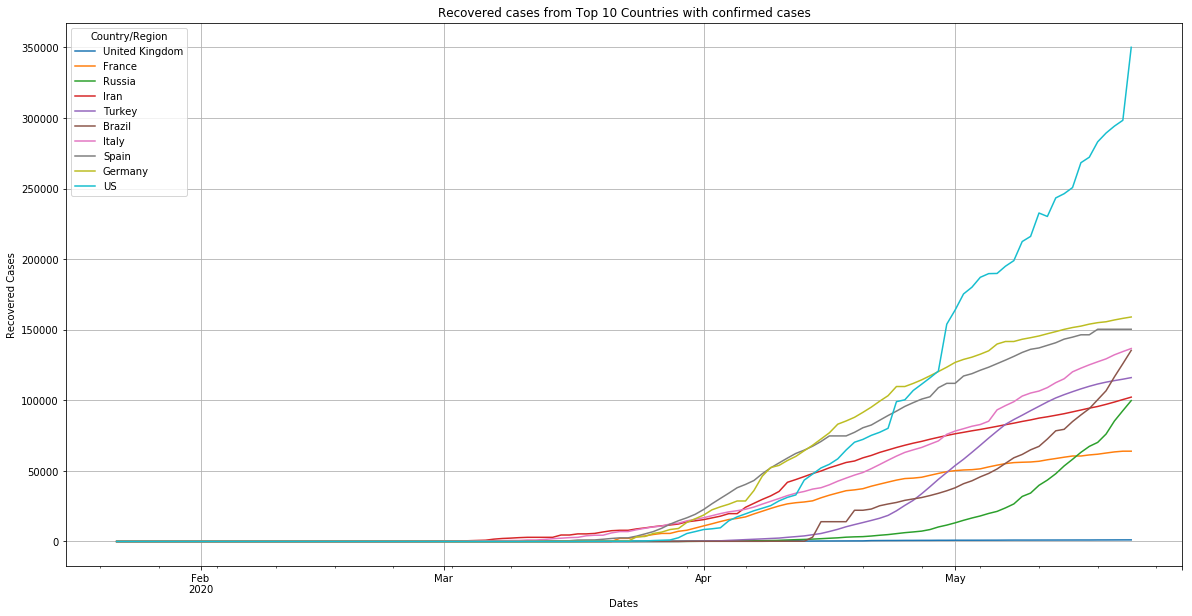

In [261]:
fig = plt.figure(figsize = (20, 10))
ax_2 = fig.add_subplot(1,1,1)
df_recovered = df_recovered.T
df_recovered.index = pd.to_datetime(df_recovered.index)
df_recovered.plot(ax=ax_2, legend=True)
ax_2.set_title("Recovered cases from Top 10 Countries with confirmed cases", fontsize=12)
ax_2.grid(True)
ax_2.set(xlabel='Dates', ylabel='Recovered Cases');

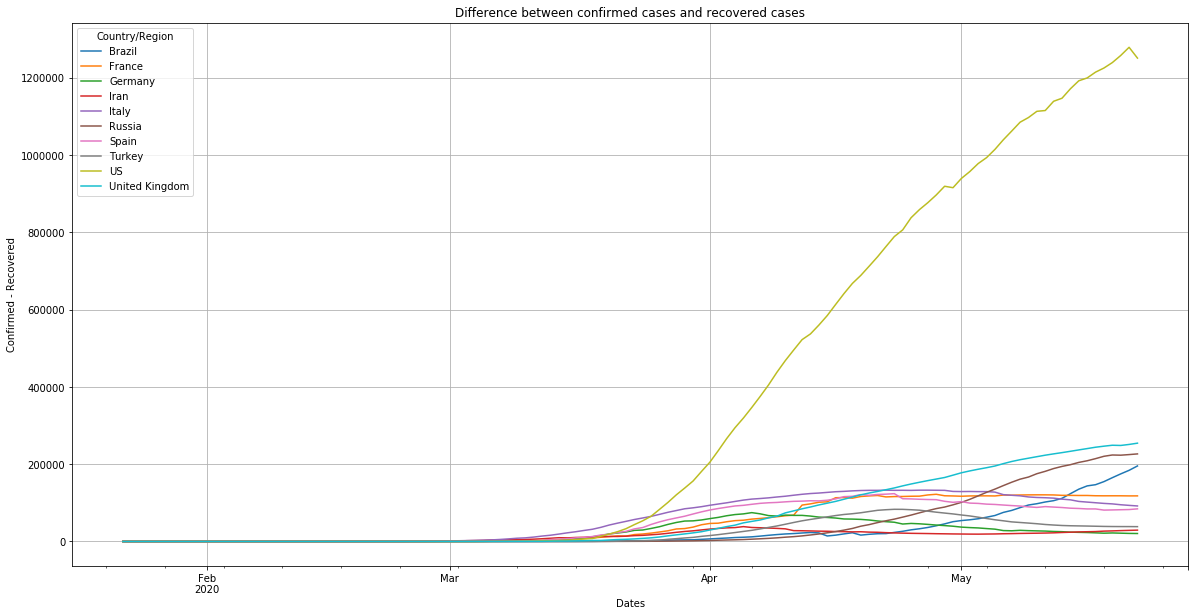

In [262]:
fig = plt.figure(figsize = (20, 10))
ax_3 = fig.add_subplot(1,1,1)
df_diff = df_top10 - df_recovered
df_diff.plot(ax=ax_3, legend=True)
ax_3.set_title("Difference between confirmed cases and recovered cases", fontsize=12)
ax_3.grid(True)
ax_3.set(xlabel='Dates', ylabel='Confirmed - Recovered');

In [263]:
df_death = df_death_cases.loc[df_death_cases['Country/Region'].isin(top10_countries)]
df_death = df_death.groupby(['Country/Region']).sum()
df_death = df_death.loc[:, start_date:end_date]
df_death = df_death.sort_values(by=[end_date]).tail(10)

In [264]:
df_death

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Russia,0,0,0,0,0,0,0,0,0,0,...,2212,2305,2418,2537,2631,2722,2837,2972,3099,3249
Turkey,0,0,0,0,0,0,0,0,0,0,...,3952,4007,4055,4096,4140,4171,4199,4222,4249,4276
Iran,0,0,0,0,0,0,0,0,0,0,...,6783,6854,6902,6937,6988,7057,7119,7183,7249,7300
Germany,0,0,0,0,0,0,0,0,0,0,...,7861,7884,7897,7938,7962,8003,8081,8144,8203,8228
Brazil,0,0,0,0,0,0,0,0,0,0,...,13240,13999,14962,15662,16118,16853,17983,18859,20047,21048
France,0,0,0,0,0,0,0,0,0,0,...,27077,27428,27532,27532,28111,28242,28025,28135,28218,28218
Spain,0,0,0,0,0,0,0,0,0,0,...,27104,27321,27459,27563,27563,27709,27778,27888,27940,28628
Italy,0,0,0,0,0,0,0,0,0,0,...,31106,31368,31610,31763,31908,32007,32169,32330,32486,32616
United Kingdom,0,0,0,0,0,0,0,0,0,0,...,33264,33693,34078,34546,34716,34876,35422,35786,36124,36475


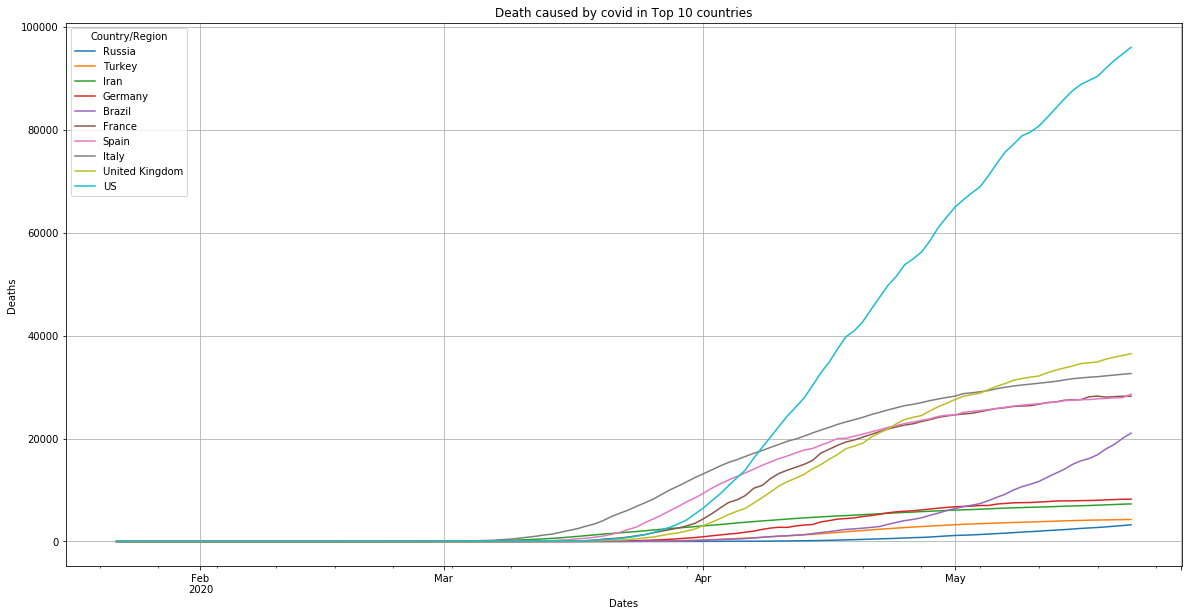

In [265]:
fig = plt.figure(figsize = (20, 10))
ax_4 = fig.add_subplot(1,1,1)
df_death = df_death.T
df_death.index = pd.to_datetime(df_death.index)
df_death.plot(ax=ax_4, legend=True)
ax_4.set_title("Death caused by covid in Top 10 countries", fontsize=12)
ax_4.grid(True)
ax_4.set(xlabel='Dates', ylabel='Deaths');

Active cases = (Confirmed Cases - (Recovered + Deaths))

ValueError: ('Unknown string format:', 'Russia')

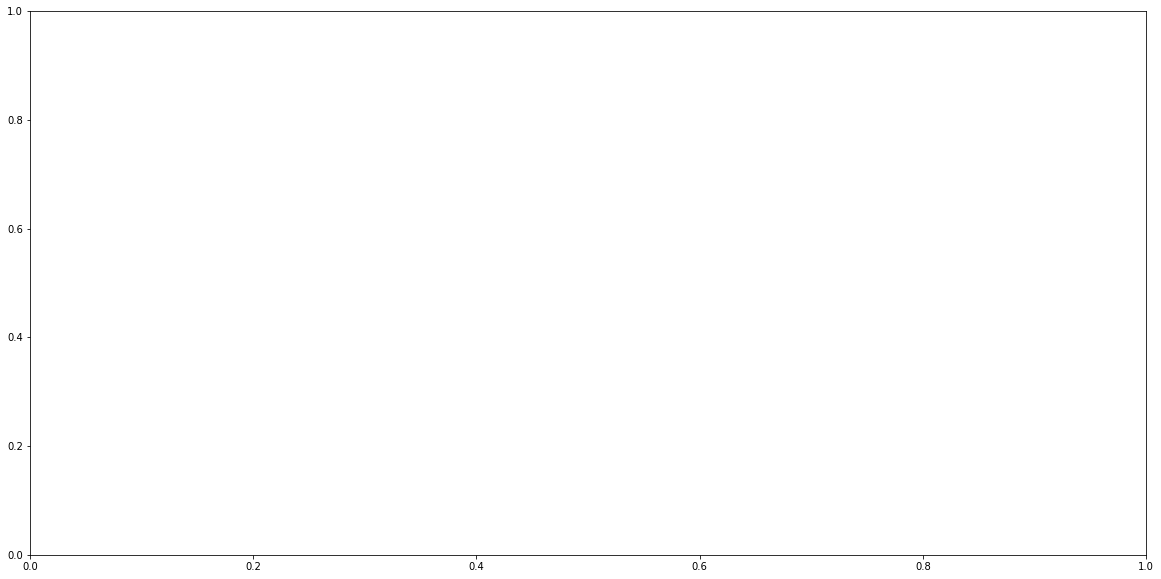

In [266]:
fig = plt.figure(figsize = (20, 10))
ax_5 = fig.add_subplot(1,1,1)
df_death = df_death.T
df_death.index = pd.to_datetime(df_death.index)
df_active = (df_top10 - (df_recovered + df_death))
df_active.plot(ax=ax_5, legend=True)
ax_5.set_title("Active cases - Inside Top 10 Countries", fontsize=12)
ax_5.grid(True)
ax_5.set(xlabel='Dates', ylabel='Active Cases');

#### Brazil case study


In [ ]:
df_brazil_confirmed = df_confirmed_cases.loc[df_confirmed_cases['Country/Region'].isin(['Brazil'])]
df_brazil_recovered = df_recovered_cases.loc[df_recovered_cases['Country/Region'].isin(['Brazil'])]
df_brazil_deaths = df_death_cases.loc[df_death_cases['Country/Region'].isin(['Brazil'])]

In [ ]:
df_brazil_confirmed = df_brazil_confirmed.loc[:,start_date:end_date].T
df_brazil_confirmed.index = pd.to_datetime(df_brazil_confirmed.index)
df_brazil_confirmed.columns = ['Cases']

df_brazil_recovered = df_brazil_recovered.loc[:,start_date:end_date].T
df_brazil_recovered.index = pd.to_datetime(df_brazil_recovered.index)
df_brazil_recovered.columns = ['Cases']

df_brazil_deaths = df_brazil_deaths.loc[:,start_date:end_date].T
df_brazil_deaths.index = pd.to_datetime(df_brazil_deaths.index)
df_brazil_deaths.columns = ['Cases']

df_brazil_active = df_brazil_confirmed - df_brazil_recovered - df_brazil_deaths

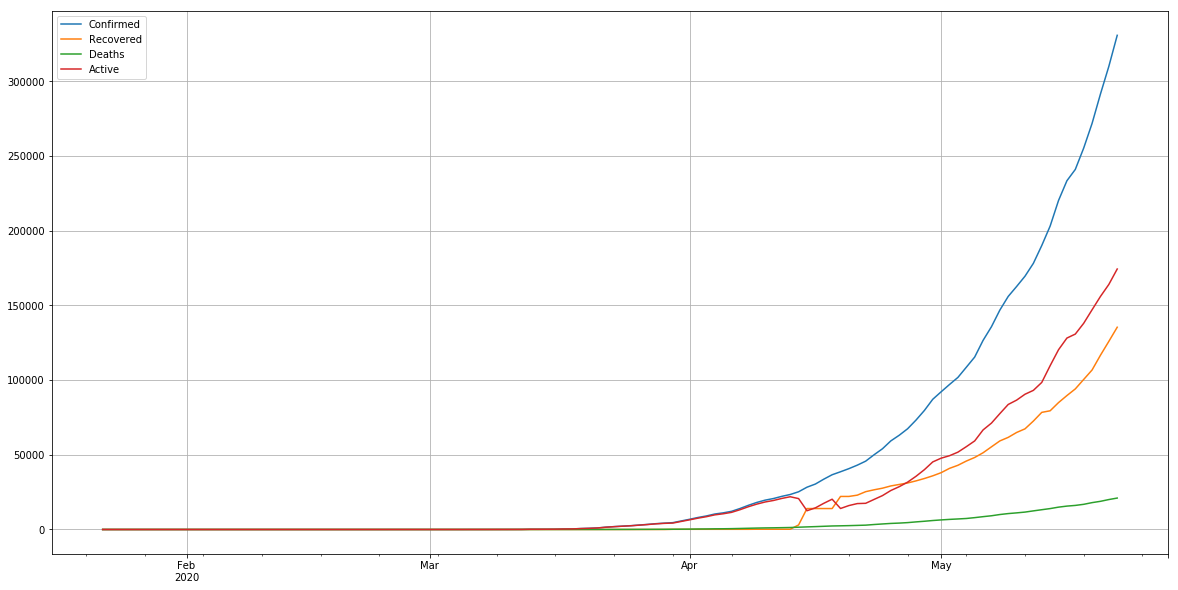

In [271]:
fig = plt.figure(figsize = (20, 10))
ax_6 = fig.add_subplot(1,1,1)
legend_name = ['Confirmed', 'Recovered', 'Deaths', 'Active']
df_brazil_confirmed.plot(ax=ax_6, legend=True)
df_brazil_recovered.plot(ax=ax_6, legend=True)
df_brazil_deaths.plot(ax=ax_6, legend=True)
df_brazil_active.plot(ax=ax_6, legend=True)
ax_6.legend(legend_name)
ax_6.grid(True)

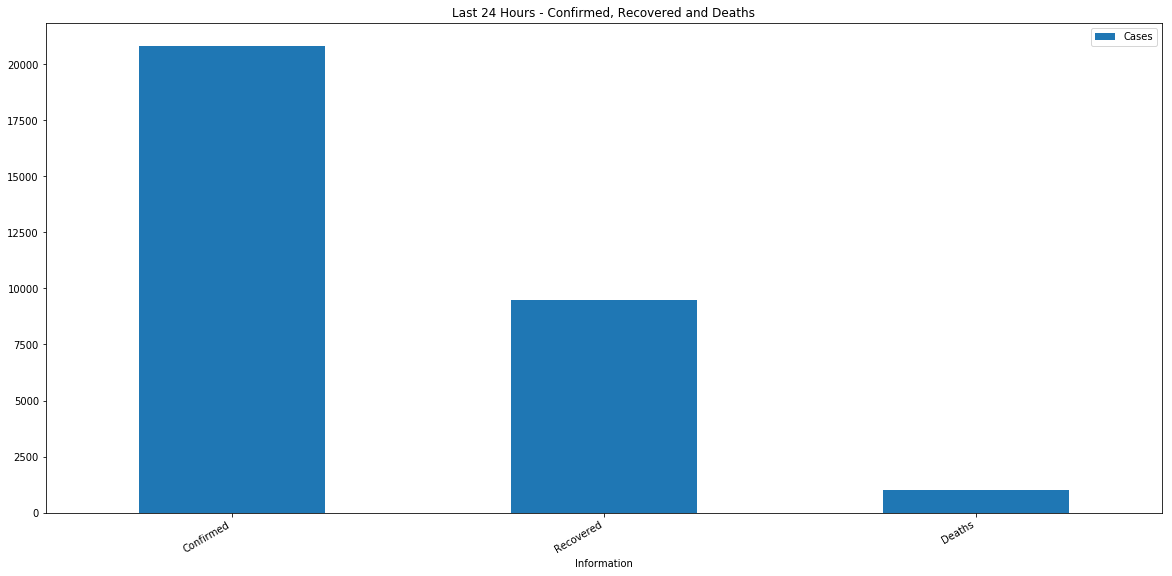

In [284]:
# Last 24 Hours
confirmed_daily = df_brazil_confirmed.iloc[-1,0] - df_brazil_confirmed.iloc[-2,0]
recovered_daily = df_brazil_recovered.iloc[-1,0] - df_brazil_recovered.iloc[-2,0]
deaths_daily = df_brazil_deaths.iloc[-1,0] - df_brazil_deaths.iloc[-2,0]
data = {'Information':['Confirmed', 'Recovered', 'Deaths'], 'Cases':[confirmed_daily, recovered_daily, deaths_daily]}
df_last24hours = pd.DataFrame(data)
fig = plt.figure(figsize = (20, 10))
ax_7 = fig.add_subplot(1,1,1)
df_last24hours.plot.bar(ax=ax_7, x='Information')
ax_7.set_title("Last 24 Hours - Confirmed, Recovered and Deaths",fontsize=12)
fig.autofmt_xdate()